In [729]:
# import lib
import numpy as np
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
from sklearn.datasets import make_moons,make_classification,make_regression
import sys
np.random.seed(23)

def _sym_decorrelation(W):
    """ Symmetric decorrelation
    i.e. W <- (W * W.T) ^{-1/2} * W
    """
    s, u = np.linalg.eigh(np.dot(W, W.T))
    # u (resp. s) contains the eigenvectors (resp. square roots of
    # the eigenvalues) of W * W.T
    return np.dot(np.dot(u * (1. / np.sqrt(s)), u.T), W)

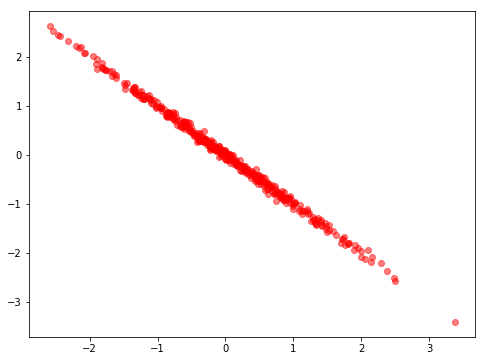

In [730]:
# See the data 
# X, y = make_moons(n_samples=300, noise=0.0)
X,y = make_regression(n_samples=400, n_features=1,noise=5); X = np.concatenate((X,y[:,None]),1) 

# ======== WE ARE CENTERING AND STD =======
X[:,1] = -X[:,1]
X = (X - X.mean(0))/X.std(0)
# ======== WE ARE CENTERING AND STD =======

plt.figure(figsize=(8,6))
# plt.scatter(X[y==0, 0], X[y==0, 1], color='red', alpha=0.5)
# plt.scatter(X[y==1, 0], X[y==1, 1], color='blue', alpha=0.5)
plt.scatter(X[:, 0], X[:,1], color='red', alpha=0.5)
plt.show()

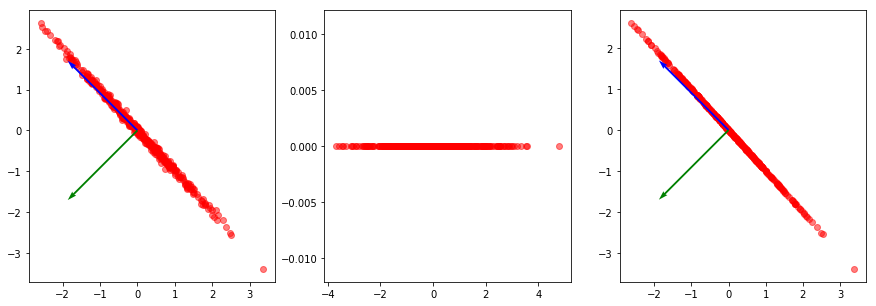

In [732]:
# traditional PCA

# 1. projection
cov = X.T @ X / X.shape[1]
evalue,evector = np.linalg.eig(cov)
idx = np.argsort(evalue)[::-1]
evecs = evector[:,idx]
projected = X @ evecs[:,0]
recovered = projected[:,None] @ evecs[:,0][:,None].T

# 2. recover
plt.figure(figsize=(15,5))
plt.subplot(1, 3, 1)
plt.scatter(X[:, 0], X[:,1], color='red', alpha=0.5)
plt.quiver(X.mean(0)[0], X.mean(0)[1], evector[0,0],evector[0,1], color=['b'], scale=2.5)
plt.quiver(X.mean(0)[0], X.mean(0)[1], evector[1,0],evector[1,1], color=['g'], scale=2.5)

plt.subplot(1, 3, 2)
plt.scatter(projected,np.zeros(len(projected)), color='red', alpha=0.5)

plt.subplot(1, 3, 3)
plt.scatter(recovered[:, 0], recovered[:,1], color='red', alpha=0.5)
plt.quiver(X.mean(0)[0], X.mean(0)[1], evector[0,0],evector[0,1], color=['b'], scale=2.5)
plt.quiver(X.mean(0)[0], X.mean(0)[1], evector[1,0],evector[1,1], color=['g'], scale=2.5)

plt.show()

Before :  1.0501929220823982  After :  0.9999999999999999


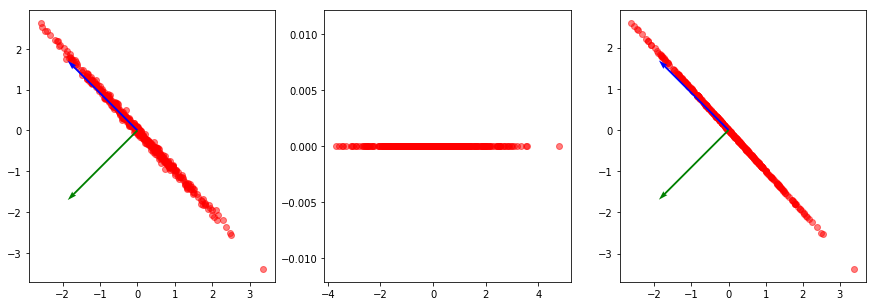

In [733]:
# simple method
w = np.random.randn(2,1)
print('Before : ',np.sqrt(np.sum(w**2)),end=' ')
w = w/(np.sqrt(np.sum(w**2)))
print(' After : ',np.sqrt(np.sum(w**2)))
w = -2 * X.T @ X @ w
# w = (np.eye(2)+0.5 * X.T @ X ) @ w
w = w/(np.sqrt(np.sum(w**2)))

projected_mine = X @ w
recover_mine   = projected_mine @ w.T

plt.figure(figsize=(15,5))
plt.subplot(1, 3, 1)
plt.scatter(X[:, 0], X[:,1], color='red', alpha=0.5)
plt.quiver(X.mean(0)[0], X.mean(0)[1], evector[0,0],evector[0,1], color=['b'], scale=2.5)
plt.quiver(X.mean(0)[0], X.mean(0)[1], evector[1,0],evector[1,1], color=['g'], scale=2.5)

plt.subplot(1, 3, 2)
plt.scatter(projected_mine,np.zeros(len(projected)), color='red', alpha=0.5)

plt.subplot(1, 3, 3)
plt.scatter(recover_mine[:, 0], recover_mine[:,1], color='red', alpha=0.5)
plt.quiver(X.mean(0)[0], X.mean(0)[1], evector[0,0],evector[0,1], color=['b'], scale=2.5)
plt.quiver(X.mean(0)[0], X.mean(0)[1], evector[1,0],evector[1,1], color=['g'], scale=2.5)

plt.show()

In [734]:
print(np.allclose(recover_mine,recovered,atol=0.01))
print(np.allclose(np.sign(w)*w,np.sign(evecs[:,0])*evecs[:,0],atol=0.01))
print(np.sign(w)*w)
print(np.sign(evecs[:,0])*evecs[:,0])

False
True
[[0.70923975]
 [0.70496736]]
[0.70710678 0.70710678]


(400, 2)
Iter :  0  Loss:  16.370759959211487
Iter :  20  Loss:  16.370763033742342
Iter :  40  Loss:  16.370766119052895
Iter :  60  Loss:  16.37076920221607
Iter :  80  Loss:  16.370772286394818


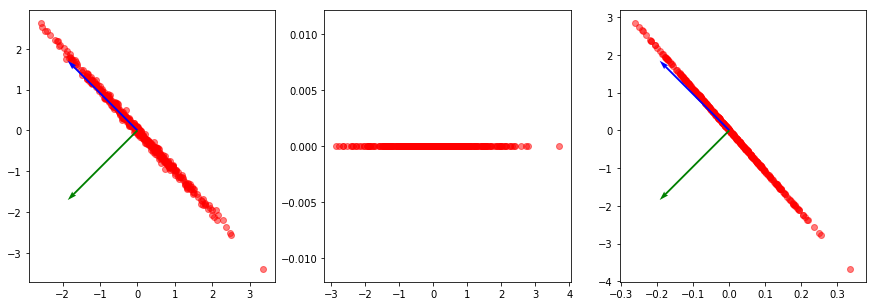

False
False
[[0.09126418]
 [0.99582672]]
[0.70710678 0.70710678]


In [735]:
# iterative
# w = np.random.uniform(0,1,size=(2,1))
w = np.random.randn(2,1)
w = w/(np.sqrt(np.sum(w**2)))
m = np.zeros_like(w)
temp_X = np.copy(X)
print(temp_X.shape)

for iter in range(100):
    cum_loss = 0
    temp_X   = shuffle(temp_X)
    for mini_batch in range(0,len(X),10):
        current_batch = temp_X[mini_batch:mini_batch+10]
        loss          = current_batch - current_batch@w@w.T
        grad          = (current_batch.T@loss + loss.T @ current_batch) @ w
        m = 0.9 * m + 0.1 * grad
        w = w - 0.00000000001* m
        w = w/(np.sqrt(np.sum(w**2)))
        cum_loss      = cum_loss + (loss**2).mean()
    if iter%20==0:print('Iter : ',iter," Loss: ",cum_loss)

projected_mine = X @ w
recover_mine   = projected_mine @ w.T

plt.figure(figsize=(15,5))
plt.subplot(1, 3, 1)
plt.scatter(X[:, 0], X[:,1], color='red', alpha=0.5)
plt.quiver(X.mean(0)[0], X.mean(0)[1], evector[0,0],evector[0,1], color=['b'], scale=2.5)
plt.quiver(X.mean(0)[0], X.mean(0)[1], evector[1,0],evector[1,1], color=['g'], scale=2.5)

plt.subplot(1, 3, 2)
plt.scatter(projected_mine,np.zeros(len(projected)), color='red', alpha=0.5)

plt.subplot(1, 3, 3)
plt.scatter(recover_mine[:, 0], recover_mine[:,1], color='red', alpha=0.5)
plt.quiver(X.mean(0)[0], X.mean(0)[1], evector[0,0],evector[0,1], color=['b'], scale=2.5)
plt.quiver(X.mean(0)[0], X.mean(0)[1], evector[1,0],evector[1,1], color=['g'], scale=2.5)

plt.show()

print(np.allclose(recover_mine,recovered,atol=0.01))
print(np.allclose(np.sign(w)*w,np.sign(evecs[:,0])*evecs[:,0],atol=0.01))
print(np.sign(w)*w)
print(np.sign(evecs[:,0])*evecs[:,0])

Iter :  0  Loss:  3.921878403253255
Iter :  20  Loss:  3.9218795212000743
Iter :  40  Loss:  3.9218806428275808
Iter :  60  Loss:  3.921881763086703
Iter :  80  Loss:  3.9218828842528497


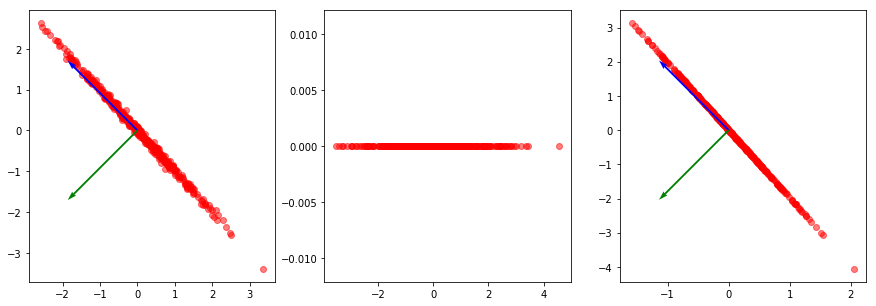

False
False
[[0.45115208]
 [0.89244709]]
[0.70710678 0.70710678]


In [736]:
# iterative
# w = np.random.uniform(0,1,size=(2,1))
w = np.random.randn(2,1)
w = w/(np.sqrt(np.sum(w**2)))
m = np.zeros_like(w)
temp_X = np.copy(X)

for iter in range(100):
    cum_loss = 0
    temp_X   = shuffle(temp_X)
    for mini_batch in range(0,len(X),10):
        current_batch = temp_X[mini_batch:mini_batch+10]
        loss          = current_batch - current_batch@w@w.T
        grad          = (np.eye(2) + current_batch.T @ current_batch ) @ w
        m = 0.9 * m + 0.1 * grad
        w = w - 0.00000000001* m
        w = w/(np.sqrt(np.sum(w**2)))
        cum_loss      = cum_loss + (loss**2).mean()
    if iter%20==0:print('Iter : ',iter," Loss: ",cum_loss)

projected_mine = X @ w
recover_mine   = projected_mine @ w.T

plt.figure(figsize=(15,5))
plt.subplot(1, 3, 1)
plt.scatter(X[:, 0], X[:,1], color='red', alpha=0.5)
plt.quiver(X.mean(0)[0], X.mean(0)[1], evector[0,0],evector[0,1], color=['b'], scale=2.5)
plt.quiver(X.mean(0)[0], X.mean(0)[1], evector[1,0],evector[1,1], color=['g'], scale=2.5)

plt.subplot(1, 3, 2)
plt.scatter(projected_mine,np.zeros(len(projected)), color='red', alpha=0.5)

plt.subplot(1, 3, 3)
plt.scatter(recover_mine[:, 0], recover_mine[:,1], color='red', alpha=0.5)
plt.quiver(X.mean(0)[0], X.mean(0)[1], evector[0,0],evector[0,1], color=['b'], scale=2.5)
plt.quiver(X.mean(0)[0], X.mean(0)[1], evector[1,0],evector[1,1], color=['g'], scale=2.5)

plt.show()

print(np.allclose(recover_mine,recovered,atol=0.01))
print(np.allclose(np.sign(w)*w,np.sign(evecs[:,0])*evecs[:,0],atol=0.01))
print(np.sign(w)*w)
print(np.sign(evecs[:,0])*evecs[:,0])

Iter :  0  Loss:  22.1361770323052
Iter :  20  Loss:  22.13617703859157
Iter :  40  Loss:  22.136177044894794
Iter :  60  Loss:  22.136177051204065
Iter :  80  Loss:  22.13617705751002


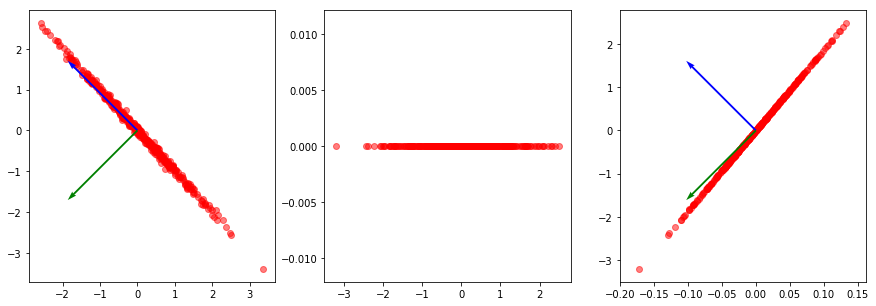

False
False
[[0.05357123]
 [0.99856403]]
[0.70710678 0.70710678]


In [737]:
# iterative
# w = np.random.uniform(0,1,size=(2,1))
w = np.random.randn(2,1)
w = w/(np.sqrt(np.sum(w**2)))
m = np.zeros_like(w)
temp_X = np.copy(X)

for iter in range(100):
    cum_loss = 0
    temp_X   = shuffle(temp_X)
    for mini_batch in range(0,len(X),10):
        current_batch = temp_X[mini_batch:mini_batch+10]
        loss          = current_batch - current_batch@w@w.T
        grad          = (np.eye(2) + current_batch.T @ current_batch ) @ w + (current_batch.T@loss + loss.T @ current_batch) @ w
        m = 0.9 * m + 0.1 * grad
        w = w - 0.00000000000001* m
        w = w/(np.sqrt(np.sum(w**2)))
        cum_loss      = cum_loss + (loss**2).mean()
    if iter%20==0:print('Iter : ',iter," Loss: ",cum_loss)

projected_mine = X @ w
recover_mine   = projected_mine @ w.T

plt.figure(figsize=(15,5))
plt.subplot(1, 3, 1)
plt.scatter(X[:, 0], X[:,1], color='red', alpha=0.5)
plt.quiver(X.mean(0)[0], X.mean(0)[1], evector[0,0],evector[0,1], color=['b'], scale=2.5)
plt.quiver(X.mean(0)[0], X.mean(0)[1], evector[1,0],evector[1,1], color=['g'], scale=2.5)

plt.subplot(1, 3, 2)
plt.scatter(projected_mine,np.zeros(len(projected)), color='red', alpha=0.5)

plt.subplot(1, 3, 3)
plt.scatter(recover_mine[:, 0], recover_mine[:,1], color='red', alpha=0.5)
plt.quiver(X.mean(0)[0], X.mean(0)[1], evector[0,0],evector[0,1], color=['b'], scale=2.5)
plt.quiver(X.mean(0)[0], X.mean(0)[1], evector[1,0],evector[1,1], color=['g'], scale=2.5)

plt.show()

print(np.allclose(recover_mine,recovered,atol=0.01))
print(np.allclose(np.sign(w)*w,np.sign(evecs[:,0])*evecs[:,0],atol=0.01))
print(np.sign(w)*w)
print(np.sign(evecs[:,0])*evecs[:,0])

Iter :  0  Loss:  799.323080278654
Iter :  20  Loss:  799.3230802786554
Iter :  40  Loss:  799.3230802786567
Iter :  60  Loss:  799.3230802786584
Iter :  80  Loss:  799.3230802786602


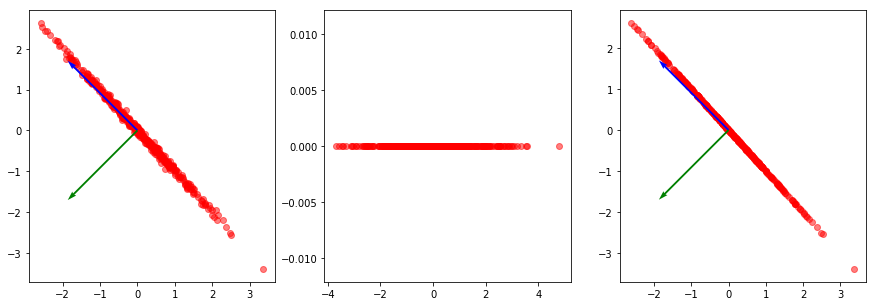

True
False
[[0.70535693]
 [0.70885231]]
[[1.]]
[0.70710678 0.70710678]


In [739]:
# iterative
# w = np.random.uniform(0,1,size=(2,1))
w1 = np.random.randn(2,1)
w2 = np.random.randn(1,1)
w1 = w1/(np.sqrt(np.sum(w1**2)))
w2 = w2/(np.sqrt(np.sum(w2**2)))

temp_X = np.copy(X)
for iter in range(100):
    cum_loss = 0
    temp_X   = shuffle(temp_X)
    for mini_batch in range(0,len(X),10):
        current_batch = temp_X[mini_batch:mini_batch+10]
        
        layer1 = current_batch @ w1
        layer2 = layer1        @ w2
        
        loss  = w2.T @ layer1.T @ layer1 @ w2
        grad2 = -layer1.T @ layer1 @ w2
        grad1 = current_batch.T@(-layer1@w2@w2.T)
        
        w2 = w2 - 0.00000000000001* grad2
        w1 = w1 - 0.00000000000001* grad1
        w1 = w1/(np.sqrt(np.sum(w1**2)))
        w2 = w2/(np.sqrt(np.sum(w2**2)))
        cum_loss      = cum_loss + loss.mean()
        
    if iter%20==0:print('Iter : ',iter," Loss: ",cum_loss)

projected_mine = X @ w1 @ w2
recover_mine   = projected_mine @ w2.T @ w1.T

plt.figure(figsize=(15,5))
plt.subplot(1, 3, 1)
plt.scatter(X[:, 0], X[:,1], color='red', alpha=0.5)
plt.quiver(X.mean(0)[0], X.mean(0)[1], evector[0,0],evector[0,1], color=['b'], scale=2.5)
plt.quiver(X.mean(0)[0], X.mean(0)[1], evector[1,0],evector[1,1], color=['g'], scale=2.5)

plt.subplot(1, 3, 2)
plt.scatter(projected_mine,np.zeros(len(projected)), color='red', alpha=0.5)

plt.subplot(1, 3, 3)
plt.scatter(recover_mine[:, 0], recover_mine[:,1], color='red', alpha=0.5)
plt.quiver(X.mean(0)[0], X.mean(0)[1], evector[0,0],evector[0,1], color=['b'], scale=2.5)
plt.quiver(X.mean(0)[0], X.mean(0)[1], evector[1,0],evector[1,1], color=['g'], scale=2.5)

plt.show()

print(np.allclose(recover_mine,recovered,atol=0.01))
print(np.allclose(np.sign(w)*w,np.sign(evecs[:,0])*evecs[:,0],atol=0.01))
print(np.sign(w1)*w1)
print(np.sign(w2)*w2)
print(np.sign(evecs[:,0])*evecs[:,0])

Iter :  0  Loss:  6.986559912049227
Iter :  20  Loss:  6.986559915051244
Iter :  40  Loss:  6.986559918053586
Iter :  60  Loss:  6.98655992105556
Iter :  80  Loss:  6.98655992405734


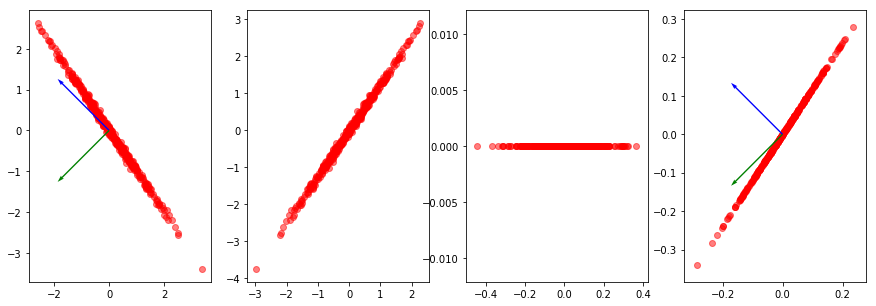

False
False
[[0.99391929 0.11011103]
 [0.11011103 0.99391929]]
[[0.72200596]
 [0.69188684]]
[0.70710678 0.70710678]


In [746]:
# iterative (more dim)
# w = np.random.uniform(0,1,size=(2,1))
w1 = np.random.randn(2,2)
w2 = np.random.randn(2,1)
w1 = _sym_decorrelation(w1)
w2 = w2/(np.sqrt(np.sum(w2**2)))

temp_X = np.copy(X)
for iter in range(100):
    cum_loss = 0
    temp_X   = shuffle(temp_X)
    for mini_batch in range(0,len(X),10):
        current_batch = temp_X[mini_batch:mini_batch+10]
        
        layer1 = current_batch @ w1
        layer2 = layer1        @ w2
        loss  = w2.T @ layer1.T @ layer1 @ w2
        grad2 = -layer1.T @ layer1 @ w2
        grad1 = current_batch.T@(-layer1@w2@w2.T)
        
        w2 = w2 - 0.00000000000001* grad2
        w1 = w1 - 0.00000000000001* grad1
        w1 = _sym_decorrelation(w1)
        w2 = w2/(np.sqrt(np.sum(w2**2)))
        cum_loss      = cum_loss + loss.mean()
        
    if iter%20==0:print('Iter : ',iter," Loss: ",cum_loss)

projected_mine = X @ w1 @ w2
recover_mine   = projected_mine @ w2.T @ w1.T

plt.figure(figsize=(15,5))
plt.subplot(1, 4, 1)
plt.scatter(X[:, 0], X[:,1], color='red', alpha=0.5)
plt.quiver(X.mean(0)[0], X.mean(0)[1], evector[0,0],evector[0,1], color=['b'], scale=2.5)
plt.quiver(X.mean(0)[0], X.mean(0)[1], evector[1,0],evector[1,1], color=['g'], scale=2.5)

plt.subplot(1, 4, 2)
plt.scatter(X @ w1[:, 0], X @ w1[:,1], color='red', alpha=0.5)

plt.subplot(1, 4, 3)
plt.scatter(projected_mine,np.zeros(len(projected)), color='red', alpha=0.5)

plt.subplot(1, 4, 4)
plt.scatter(recover_mine[:, 0], recover_mine[:,1], color='red', alpha=0.5)
plt.quiver(X.mean(0)[0], X.mean(0)[1], evector[0,0],evector[0,1], color=['b'], scale=2.5)
plt.quiver(X.mean(0)[0], X.mean(0)[1], evector[1,0],evector[1,1], color=['g'], scale=2.5)

plt.show()

print(np.allclose(recover_mine,recovered,atol=0.01))
print(np.allclose(np.sign(w)*w,np.sign(evecs[:,0])*evecs[:,0],atol=0.01))
print(np.sign(w1)*w1)
print(np.sign(w2)*w2)
print(np.sign(evecs[:,0])*evecs[:,0])

In [715]:
# whiten
temp = np.random.randn(2,2)
temp2= _sym_decorrelation(temp)
print(temp)
print(np.sqrt(np.sum(temp**2,0)))
print(temp2)
print(np.sqrt(np.sum(temp2**2,0)))

[[-0.20184052  1.04537128]
 [ 0.53816197  0.81211867]]
[0.57476769 1.32375898]
[[-0.53924154  0.84215115]
 [ 0.84215115  0.53924154]]
[1. 1.]


In [706]:
# gradient
temp = np.random.randn(2,1)
print((np.eye(2)+X.T@X)@temp)
print(temp+X.T@X@temp)
print(X.T@X@temp)

[[-331.01649274]
 [ 330.76155127]]
[[-331.01649274]
 [ 330.76155127]]
[[-330.52681434]
 [ 330.4243461 ]]


In [705]:
# trace
temp = np.random.uniform(size=(5,5))
print(temp)
evalue,evector = np.linalg.eigh(temp)
print(np.diag(temp).sum())
print(evalue.sum())

[[0.59957073 0.4179     0.33564758 0.47885035 0.19466667]
 [0.97630966 0.79208879 0.5297333  0.8280434  0.59174909]
 [0.69528467 0.71563046 0.4198738  0.75446309 0.57951776]
 [0.19209108 0.28379276 0.26153899 0.28961355 0.15620311]
 [0.5442491  0.94424172 0.60280994 0.1614653  0.44792688]]
2.5490737389147675
2.549073738914767


<img src="https://i.imgur.com/Isv9zzD.png" >

# Reference 
1. results, P., & Rieble, N. (2016). PCA in numpy and sklearn produces different results. Cross Validated. Retrieved 9 April 2019, from https://stats.stackexchange.com/questions/235882/pca-in-numpy-and-sklearn-produces-different-results
2. Python, H., & Eunice, J. (2017). How to make two plots side-by-side using Python. Stack Overflow. Retrieved 9 April 2019, from https://stackoverflow.com/questions/42818361/how-to-make-two-plots-side-by-side-using-python
3. The Theorem that the Sum of the Eigenvalues of a Matrix is Equal to its Trace . (2019). Applet-magic.com. Retrieved 9 April 2019, from http://www.applet-magic.com/eigenvaluestrace.htm
4. 